<center> <b>UCGIS I-GUIDE Community Champion Project</b> </center>


# 2020 Census and Differential Privacy
<i>Yue Lin, The Ohio State University</i>

Census data are one of the largest public data sources in the United States, which contain detailed demographic information and have widely been used to redraw voting districts, direct federal funding, and inform policymaking and research. [Title 13 of the United States Code](https://www.census.gov/history/www/reference/privacy_confidentiality/title_13_us_code.html#:~:text=People%20sworn%20to%20uphold%20Title,is%20a%20serious%20federal%20crime) states that federal agencies are not permitted to release personally identifiable information from the census. However, this becomes increasingly challenging because the advances in computing power and the availability of commercial data sets have made it easier to link ostensibly anonymized census data to specific individuals. 

To enhance individual privacy protection in the 2020 Census, the Census Bureau established a privacy protection system based on a mathematical concept known as [differential privacy](https://en.wikipedia.org/wiki/Differential_privacy)[<sup>1</sup>](#fn1). Developed at Microsoft Research, differential privacy has become the gold standard for data privacy in various applications from both private and public sectors. This notebook describes the use of differential privacy for census data as well as how it will affect the census data.

**Related Topics in GIS&T Body of Knowledge:** [United States Census Data](https://doi.org/10.22224/gistbok/2019.1.8), [Location Privacy](http://dx.doi.org/10.22224/gistbok/2016.3.2)

## Notebook Outline
- [Differential Privacy for Census Data](#sec1)
- [How will Differential Privacy Affect the Utility of Census Data?](#sec2)
- [Additional Resources](#sec3)
- [References](#ref)

<a id='sec1'></a>
## Differential Privacy for Census Data
Differential privacy seeks to conceal the presence or absence of any individual (or small groups of individuals) in a database while preserving statistical utility. A general way to achieve differential privacy is to add “noise” to the collected data. In the 2020 United States Census, statistical noise is sampled from a Gaussian distribution and added to census data at each geographical level (from the nation, to states, down to census blocks). The amount of statistical noise added is controlled by a “privacy loss budget”, which defines the maximum amount of privacy loss that can occur upon the release of census data. As the privacy loss budget increases, the added noise decreases, implying that the census data will be more accurate, but the likelihood of private information being exploited using the census data also increases.

<img src='./figs/dp.png' width='600'/>

Source: [Disclosure Avoidance for the 2020 Census: An Introduction.](https://www2.census.gov/library/publications/decennial/2020/2020-census-disclosure-avoidance-handbook.pdf)

<a id='sec2'></a>
## How will Differential Privacy Affect the Utility of Census Data?

Because differential privacy requires adding statistical noise to census data to protect privacy, it is natural to wonder how the use of the privacy protection system may affect the utility of census data. In the years 2020 and 2021, the Census Bureau released a set of [demonstration data](https://www.census.gov/programs-surveys/decennial-census/decade/2020/planning-management/process/disclosure-avoidance/2020-das-development.html) to help users explore the impact of differential privacy on the utility and accuracy of census data. The demonstration data are a differentially private version of the 2010 Census data. To facilitate comparisons, the demonstration data are linked to the original 2010 Census Summary File 1 to form the [IPUMS NHGIS Privacy-Protected 2010 Census Demonstration Data](https://www.nhgis.org/privacy-protected-2010-census-demonstration-data) product. We retrieve this data product to demonstrate the impact of differential privacy at different geographic levels in this notebook.

Using the original 2010 Census Summary File 1 data, the code below generates maps of the percentage of Black or African Americans at the block group level in Ohio.

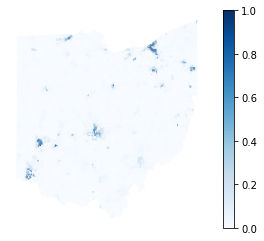

In [23]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt  # Graphics

filename_hist = 'data/nhgis_ppdd_blck_grp_oh.csv'
df = pd.read_csv(filename_hist)
df['BG'] = df['gisjoin'].astype(str).str[1:3] + df['gisjoin'].astype(str).str[4:7] + df['gisjoin'].astype(str).str[8:]

filename_gdf = 'data/tl_2010_39_bg10.shp'
gdf = gpd.read_file(filename_gdf)

df['black_sf'] = df['H72004_sf'] / df['H72001_sf']
merged = gdf.set_index('GEOID10').join(df.set_index('BG'))
fig = merged.plot(column='black_sf', legend=True, cmap='Blues')
fig.set_axis_off()

The percentage obtained from the SF1 data is then compared to the percentage obtained from the differentially private version of the data. To measure their differences, we calculate the symmetric mean absolute percentage error (SMAPE or sMAPE), where a SMAPE close to one indicates a larger difference between the two. The map below demonstrates that the differences caused by the privacy protection system are not spatially invariant. n some areas, the value of SMAPE can reach one, implying significant error and thus substantial utility loss.

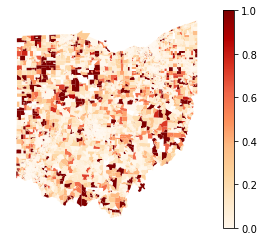

In [30]:
df['diff'] = abs(df['H72004_dp'] / df['H72001_dp'] - df['H72004_sf'] / df['H72001_sf']) / (df['H72004_dp'] / df['H72001_dp'] + df['H72004_sf'] / df['H72001_sf'])
merged = gdf.set_index('GEOID10').join(df.set_index('BG'))
fig = merged.plot(column='diff', legend=True, cmap='OrRd')
fig.set_axis_off()

We compare the same set of percentages at the county level in Ohio. The map below shows the percentage of Black or African Americans from the original SF1 data.

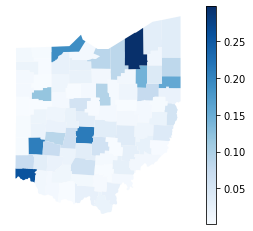

In [45]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt  # Graphics

filename_hist = 'data/nhgis_ppdd_county_oh.csv'
df = pd.read_csv(filename_hist)
df['COU'] = df['gisjoin'].astype(str).str[1:3] + df['gisjoin'].astype(str).str[4:7]

filename_gdf = 'data/tl_2010_39_county10.shp'
gdf = gpd.read_file(filename_gdf)

df['black_sf'] = df['H72004_sf'] / df['H72001_sf']
merged = gdf.set_index('GEOID10').join(df.set_index('COU'))
fig = merged.plot(column='black_sf', legend=True, cmap='Blues')
fig.set_axis_off()

At the county level, the overall difference between the percentages from the SF1 data and the differentially private data decreases.

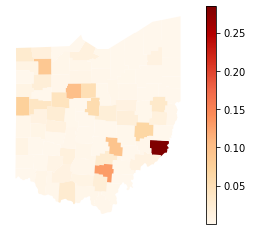

In [47]:
df['diff'] = abs(df['H72004_dp'] / df['H72001_dp'] - df['H72004_sf'] / df['H72001_sf']) / (df['H72004_dp'] / df['H72001_dp'] + df['H72004_sf'] / df['H72001_sf'])
merged = gdf.set_index('GEOID10').join(df.set_index('COU'))
fig = merged.plot(column='diff', legend=True, cmap='OrRd')
fig.set_axis_off()

<a id='sec3'></a>
## Additional Resources
- [Understanding Differential Privacy](https://www.census.gov/programs-surveys/decennial-census/decade/2020/planning-management/process/disclosure-avoidance/differential-privacy.html)
- [Disclosure Avoidance Webinar Series](https://www.census.gov/data/academy/webinars/2021/disclosure-avoidance-series.html)
- [2020 Census Data Products: Data Needs and Privacy Considerations](https://www.nationalacademies.org/our-work/2020-census-data-products-a-workshop)
- [The 2020 Census Has Thousands of Errors Added on Purpose](https://www.nytimes.com/2022/04/21/us/census-data-privacy-concerns.html)
- [Special Issue 2: Differential Privacy for the 2020 U.S. Census](https://hdsr.mitpress.mit.edu/specialissue2)

<a id='ref'></a>
## References
<span id="fn1"> Abowd, J. M. (2018, July). The US Census Bureau adopts differential privacy. In Proceedings of the 24th ACM SIGKDD International Conference on Knowledge Discovery & Data Mining (pp. 2867-2867). </span>